In [1]:
import imageio as iio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

In [26]:
brain_slice = iio.imread('./mri_brain_data/brain_mri.dcm')

type(brain_slice)

/tmp/ipykernel_5109/4035498367.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  brain_slice = iio.imread('./mri_brain_data/brain_mri.dcm')


imageio.core.util.Array

In [27]:
brain_slice.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4.1'),
      ('SOPInstanceUID',
       '1.3.12.2.1107.5.8.15.999999.30000021042714174633900000049'),
      ('StudyDate', '20200916'),
      ('SeriesDate', '20210427'),
      ('AcquisitionDate', ''),
      ('ContentDate', '20200916'),
      ('StudyTime', '101002'),
      ('SeriesTime', '141858.221328 '),
      ('AcquisitionTime', ''),
      ('ContentTime', '101649.584000 '),
      ('Modality', 'MR'),
      ('Manufacturer', 'Siemens Healthineers'),
      ('InstitutionName', 'Siemens Healthineers'),
      ('StudyDescription', 'Comp_DR-Gain_DR-Sharp_HN20ch'),
      ('SeriesDescription', 'Exported MR Basic Reading'),
      ('SeriesInstanceUID',
       '1.3.12.2.1107.5.8.15.999999.30000021042714174633900000048'),
      ('StudyInstanceUID',
       '1.3.12.2.1107.5.8.15.999999.30000020092813360707500000013'),
      ('PatientName', 'Vida_Head'),
      ('PatientID', 'Siemens_MAC'),
      ('PatientB

In [28]:
brain_slice.shape

(512, 512)

In [29]:
brain_slice.meta['sampling']

(1.0, 1.0)

In [30]:
brain_slice[0]

Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
brain_slice[:, 0]

Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

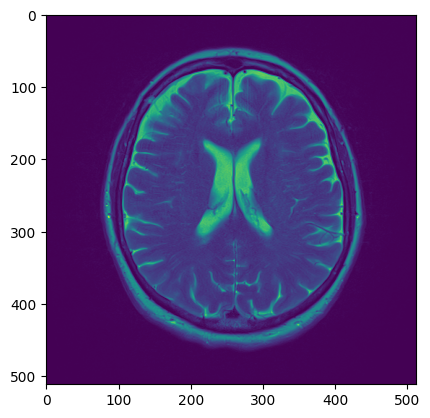

In [32]:
plt.imshow(brain_slice)

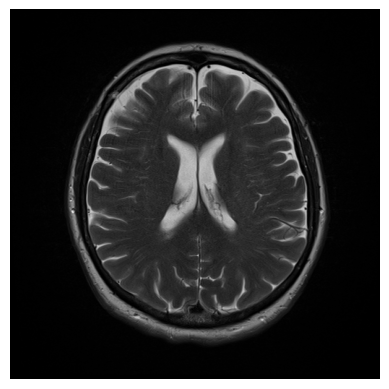

In [33]:
plt.imshow(brain_slice, cmap='gray')
plt.axis('off')
plt.show()

# Preprocessing Methods

In [16]:
pip install --upgrade distro-info


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade python-debian


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pydicom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


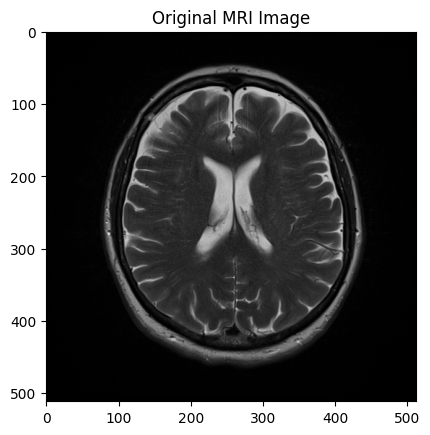

In [48]:
import pydicom
import matplotlib.pyplot as plt
dicom_file_path = "./mri_brain_data/brain_mri.dcm"
dicom_data = pydicom.dcmread(dicom_file_path)

# pixel data attribute
if hasattr(dicom_data, "PixelData"):
    # pixel data to NumPy array
    image_data = dicom_data.pixel_array
else:
   
    print("Pixel data not found in the expected attribute.")

plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")
plt.show()

# Normalized Image

In [55]:
import matplotlib.pyplot as plt
from skimage import exposure, filters, transform

In [60]:
normalized_image = exposure.rescale_intensity(image_data)
normalized_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

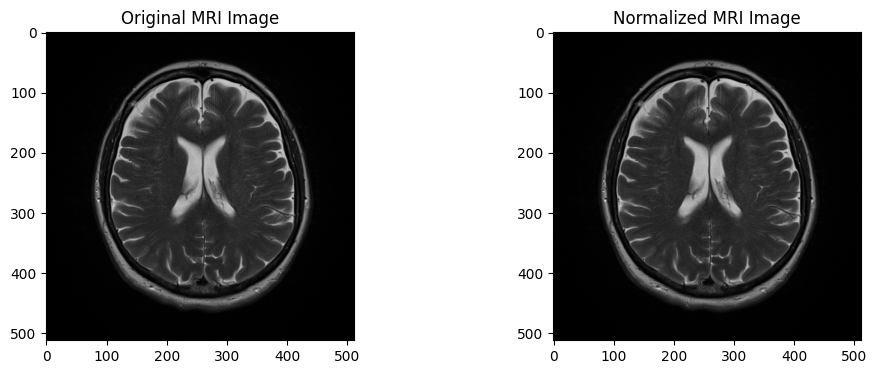

In [81]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap="gray")
plt.title("Normalized MRI Image")

plt.show()

# Denoised 

In [71]:
from skimage.filters import median
from skimage.morphology import disk
import matplotlib.pyplot as plt
kernel_size = 3
denoised_image = median(normalized_image, disk(kernel_size))
denoised_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Text(0.5, 1.0, 'Denoised MRI Image')

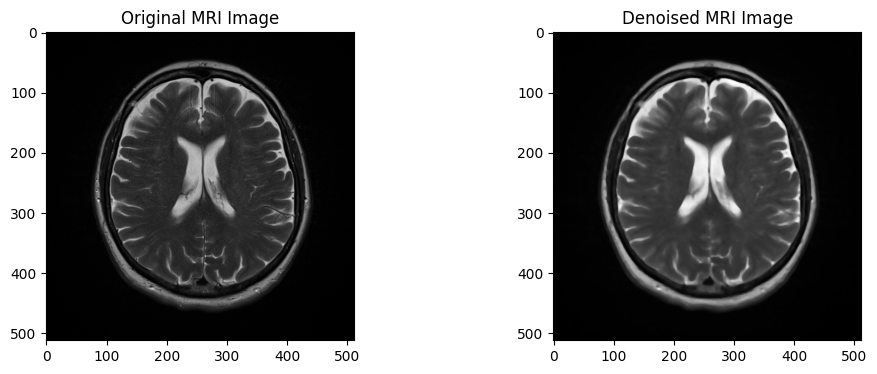

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap="gray")
plt.title("Denoised MRI Image")


# Enhancment

In [74]:
enhanced_image = exposure.equalize_hist(denoised_image)
enhanced_image

array([[0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923],
       [0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923],
       [0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923],
       ...,
       [0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923],
       [0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923],
       [0.03805923, 0.03805923, 0.03805923, ..., 0.03805923, 0.03805923,
        0.03805923]])

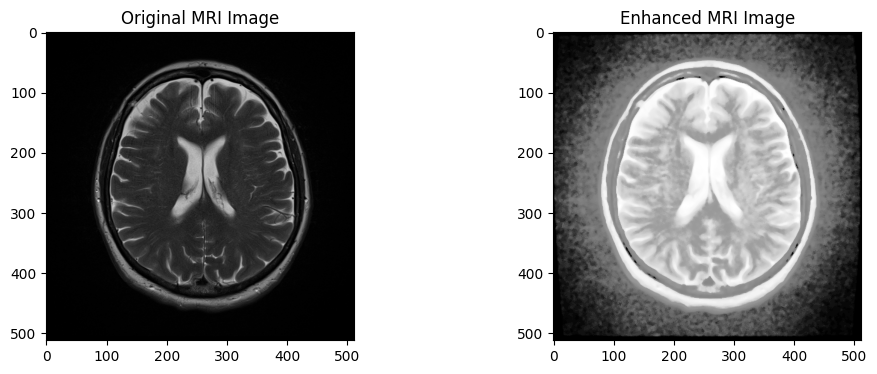

In [89]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap="gray")
plt.title("Enhanced MRI Image")


plt.show()

In [86]:
scale_factor = 0.3  
resized_image = transform.rescale(enhanced_image, scale_factor, anti_aliasing=True)

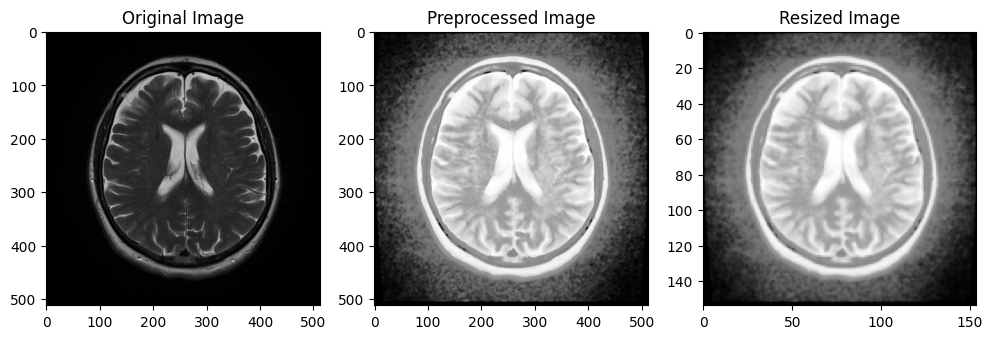

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))


axes[0].imshow(image_data, cmap='gray')
axes[0].set_title('Original Image')

# enhanced
axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Preprocessed Image')

#resize
axes[2].imshow(resized_image, cmap='gray')
axes[2].set_title('Resized Image')

plt.show()

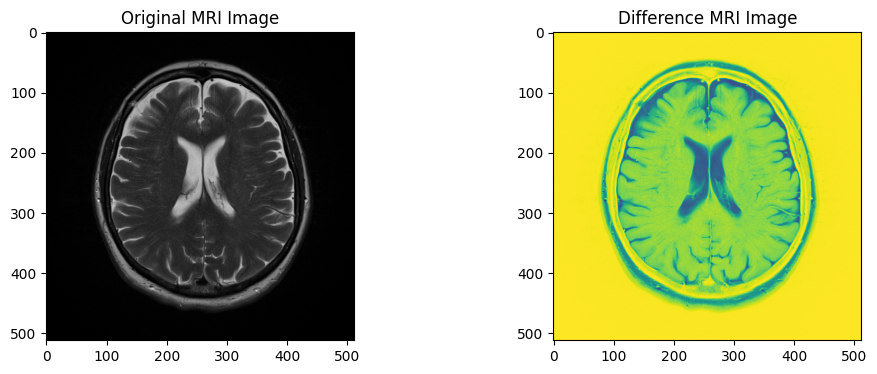

In [91]:
difference_image = enhanced_image - image_data
axes[2].imshow(difference_image, cmap='coolwarm')
axes[2].set_title('Difference Image')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(difference_image)
plt.title("Difference MRI Image")


plt.show()

# Skull Stripping

In [93]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

threshold_value = filters.threshold_otsu(enhanced_image)
binary_mask = enhanced_image > threshold_value

In [94]:
binary_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [95]:
closed_mask = morphology.binary_closing(binary_mask, morphology.disk(5))
opened_mask = morphology.binary_opening(closed_mask, morphology.disk(5))

skull_stripped_image = enhanced_image * opened_mask

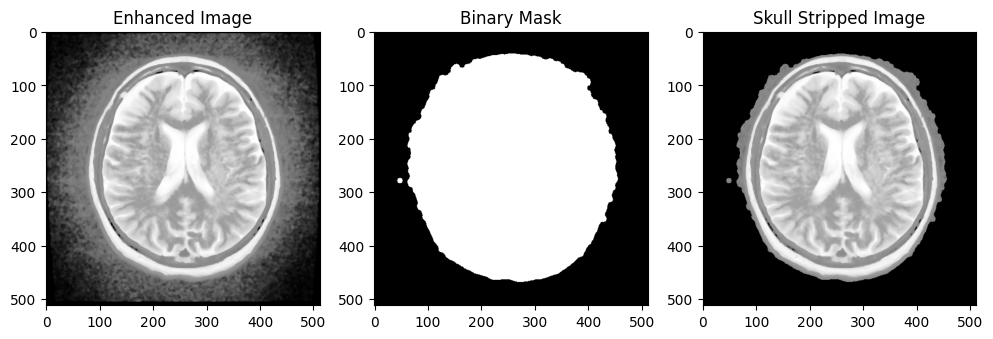

In [104]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(enhanced_image, cmap='gray')
axes[0].set_title('Enhanced Image')

# binary mask
axes[1].imshow(opened_mask, cmap='gray')
axes[1].set_title('Binary Mask')


axes[2].imshow(skull_stripped_image, cmap='gray')
axes[2].set_title('Skull Stripped Image')

plt.show()

In [ ]:
# using the 'enhanced image' didnt give us a good output
# now using original image

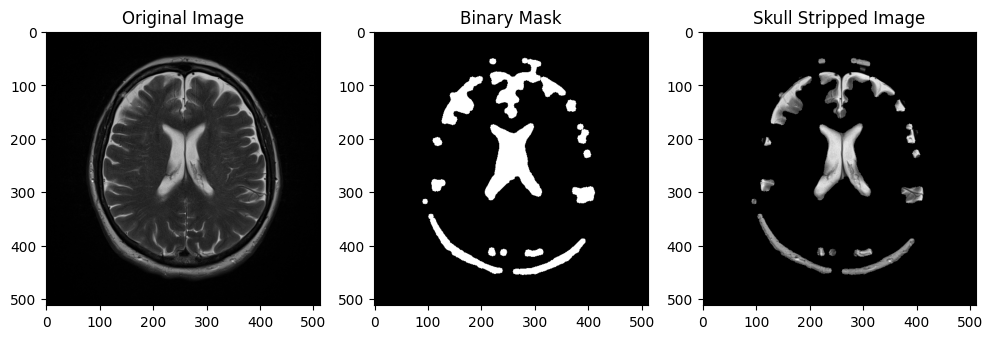

In [47]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

gray_image = color.rgb2gray(image_data) if len(image_data.shape) == 3 else image_data

# intensity-based threshold
threshold_value = filters.threshold_otsu(gray_image)
binary_mask = gray_image > threshold_value

# morphological operations to refine the mask
closed_mask = morphology.binary_closing(binary_mask, morphology.disk(5))
opened_mask = morphology.binary_opening(closed_mask, morphology.disk(5))

# mask to the original image
skull_stripped_image = gray_image * opened_mask


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')


axes[1].imshow(opened_mask, cmap='gray')
axes[1].set_title('Binary Mask')


axes[2].imshow(skull_stripped_image, cmap='gray')
axes[2].set_title('Skull Stripped Image')

plt.show()


# Equalization

In [109]:
equalized_image = exposure.equalize_hist(image_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(difference_image)
plt.title("Difference MRI Image")


plt.show()




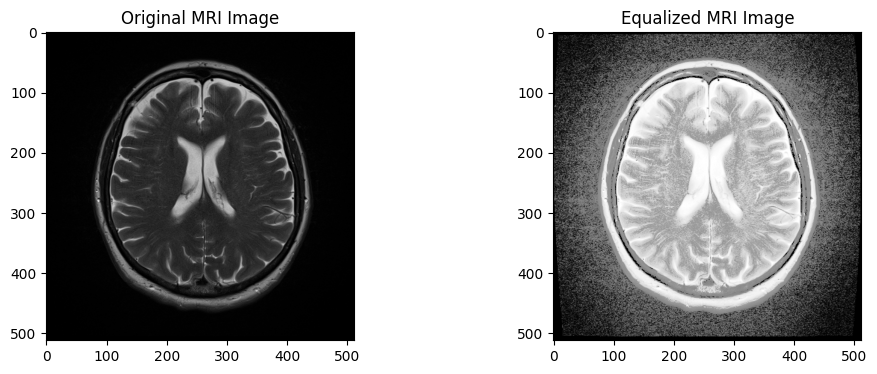

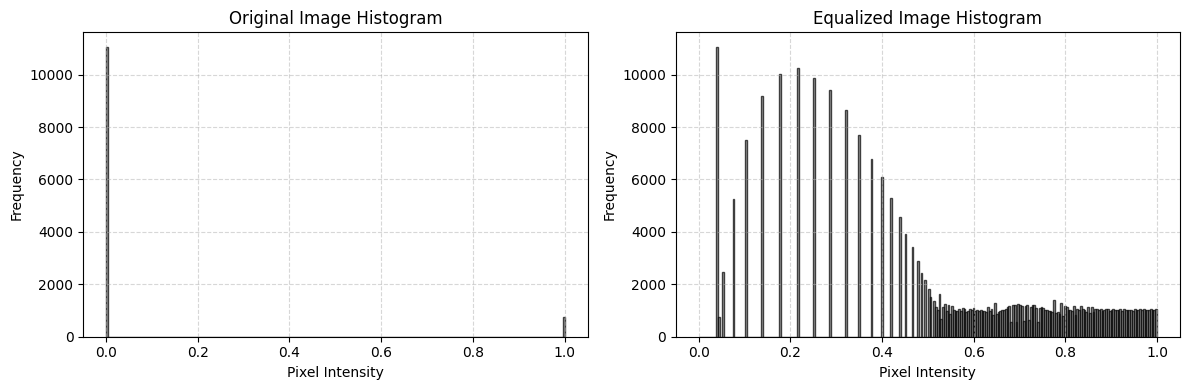

In [114]:
import matplotlib.pyplot as plt
from skimage import exposure

# histogram equalization
equalized_image = exposure.equalize_hist(image_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized MRI Image")


plt.show()



plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(image_data.flatten(), bins=256, range=(0, 1), color='gray', alpha=0.7, edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)


# Equalized Histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_image.flatten(), bins=256, range=(0, 1), color='gray', alpha=0.7, edgecolor='black')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


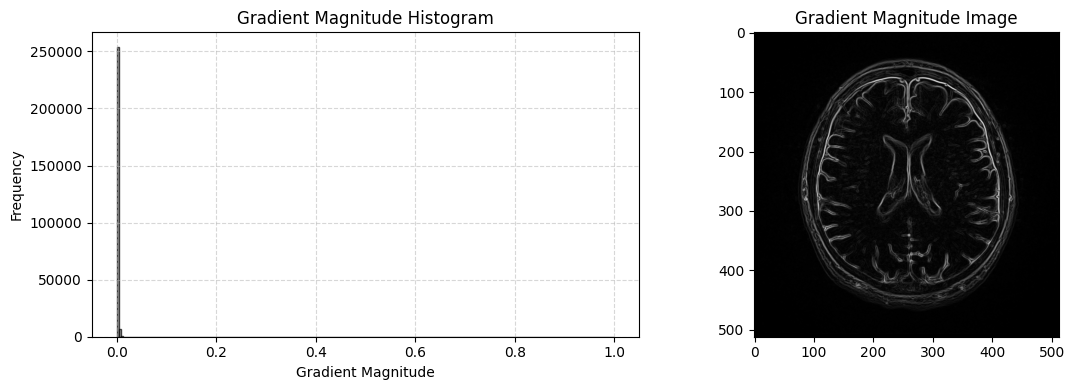

In [115]:
from skimage import filters

gradient_magnitude = filters.sobel(image_data)

plt.figure(figsize=(12, 4))

# Gradient Magnitude Histogram
plt.subplot(1, 2, 1)
plt.hist(gradient_magnitude.flatten(), bins=256, range=(0, 1), color='gray', alpha=0.7, edgecolor='black')
plt.title('Gradient Magnitude Histogram')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude Image')

plt.tight_layout()
plt.show()
